In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import db_service as dbs
import xlsx_manipulation as xls
import plots
import tables


# Pripojeni k databazi

In [3]:
client = dbs.connect_db()
coll_roc = client["db"]["rocenky"]
coll_knihy = client['db']['plem_knihy']
DROPBOX_ROOT = "/mnt/c/Users/micha/Dropbox/Diplomka Monca/"
out_opt = {
    'dir' : DROPBOX_ROOT + 'data/',
    'save': True,
    'show': False,
}

Password:········
Successfully conected to the database.


# Informace o databazi
## Druhy lemuru, ZOO, roky

In [4]:
for field in ['ZOO', 'Druh']:
    for coll in [coll_roc, coll_knihy]:
        dbs.print_unique(coll, field)

ZOO (17):
	 Brno
	 Chleby
	 Dvůr Králové
	 Děčín
	 Hodonín
	 Jihlava
	 Lešná - Zlín
	 Liberec
	 Nový Dvůr
	 Ohrada
	 Olomouc
	 Ostrava
	 Plzeň
	 Praha
	 Vyškov
	 Ústí n.L.
	 Ústí nad Labem
ZOO (3):
	 Dvůr Králové
	 Ostrava
	 Ústí nad Labem
Druh (21):
	 Lemur Sclaterův
	 Lemur bambusový
	 Lemur bělohlavý
	 Lemur běločelý
	 Lemur hnědý
	 Lemur kata
	 Lemur korunkatý
	 Lemur límcový
	 Lemur mayotský
	 Lemur mongoz
	 Lemur rudočelý
	 Lemur rákosový
	 Lemur tmavý (černý)
	 Lemur vari
	 Lemur černý
	 Lemur červenavý
	 Lemur červenobřichý
	 Lemur šedohlavý
	 Vari bělopásý
	 Vari černobílý
	 Vari červený
Druh (9):
	 Lemur Sclaterův
	 Lemur běločelý
	 Lemur kata
	 Lemur korunkatý
	 Lemur mongoz
	 Lemur tmavý
	 Lemur vari
	 Lemur červenobřichý
	 Vari červený


# Tabulky

In [4]:
tables.create_all_tables(out_opt, coll_roc, coll_knihy)

Prochazim celkem 9 tabulek:
  Tabulka 1: Druhy lemurů chovaných k 1.1. daného roku v českých zoologických zahradách v letech 1973---1990
  Tabulka 1: Druhy lemurů chovaných k 1.1. daného roku v českých zoologických zahradách v letech 1991---2000
  Tabulka 1: Druhy lemurů chovaných k 1.1. daného roku v českých zoologických zahradách v letech 2001---2009
  Tabulka 1: Druhy lemurů chovaných k 1.1. daného roku v českých zoologických zahradách v letech 2010---2019
  Tabulka 2: Odchov mláďat lemurů v českých zoologických zahradách v letech 1973---1990
  Tabulka 2: Odchov mláďat lemurů v českých zoologických zahradách v letech 1991---2000
  Tabulka 2: Odchov mláďat lemurů v českých zoologických zahradách v letech 2001---2009
  Tabulka 2: Odchov mláďat lemurů v českých zoologických zahradách v letech 2010---2019
  Tabulka 3: Živě narozená mláďata lemurů v českých zoologických zahradách v letech 1973---1990
  Tabulka 3: Živě narozená mláďata lemurů v českých zoologických zahradách v letech 1991

In [46]:
out_opt['show'] = False

# Grafy

In [47]:
plots.create_all_plots(coll_roc, out_opt)

Prochazim celkem 2 grafu:
  Graf 1: Porodnost za vsechny ZOO a vsechny druhy
	Saving /mnt/c/Users/micha/Dropbox/Diplomka Monca/data/plots/porodnost_vse.png
  Graf 2: Porodnost (relativne dle samic) za vsechny ZOO a vsechny druhy
	Saving /mnt/c/Users/micha/Dropbox/Diplomka Monca/data/plots/porodnost_rel_vse.png


## Pocet zive narozenych mladat za vsechny roky dle ZOO
### Lemur kata

In [12]:
coll_roc.find_one({})

{'_id': ObjectId('5ef6575b407d18bc970b5830'),
 'Druh': 'Lemur kata',
 'ZOO': 'Liberec',
 'Rok': 1973,
 'stav k začátku roku': {'samec': 3, 'samice': 2, 'neznámé': 0},
 'příchody': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'odchody': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'úhyny': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'jiné úbytky': {'samec': 0, 'samice': 0},
 'potraty': 0,
 'porody': 0,
 'úhyn gravidních samic': 0,
 'mrtvě narozená mláďata': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'živě narozená mláďata': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'do 5 dnů': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'do 3 měsíců': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'do konce roku': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'odchov': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'deponace': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'stav ke konci roku': {'samec': 0, 'samice': 0, 'neznámé': 0}}

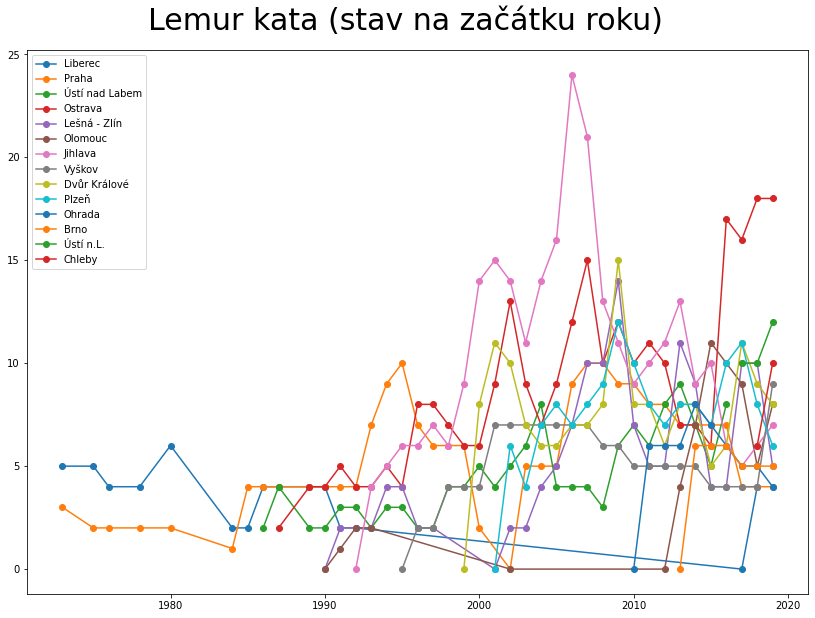

In [9]:
plots.plot_all_zoo_rok(coll_roc, 'Lemur kata', 'stav k začátku roku', out_opt)

## Porodnost pro Prahu

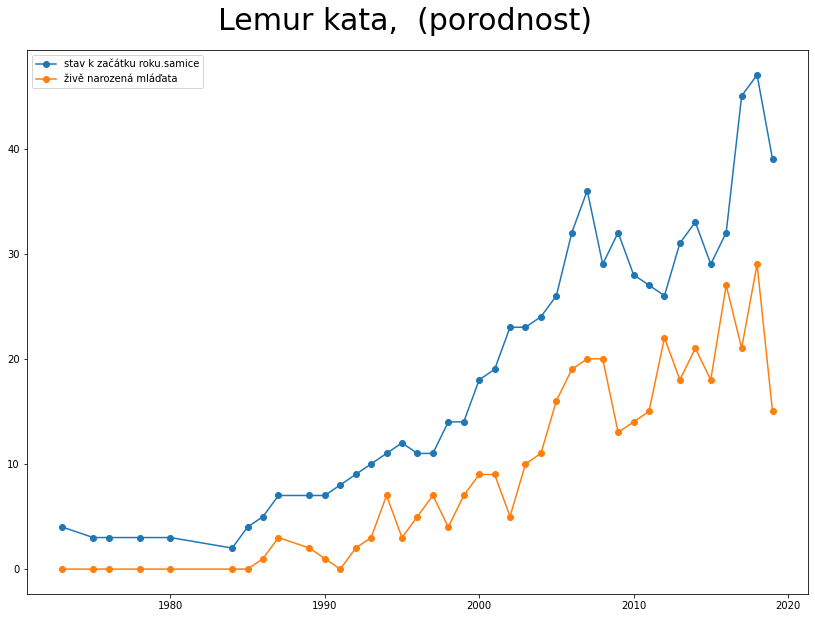

In [13]:
out_opt['suptitle'] = 'porodnost'
cats = ['stav k začátku roku.samice', 'živě narozená mláďata']
druh = 'Lemur kata'
# druh = None
plots.plot_one_zoo_rok(coll_roc, druh, None, cats, out_opt)

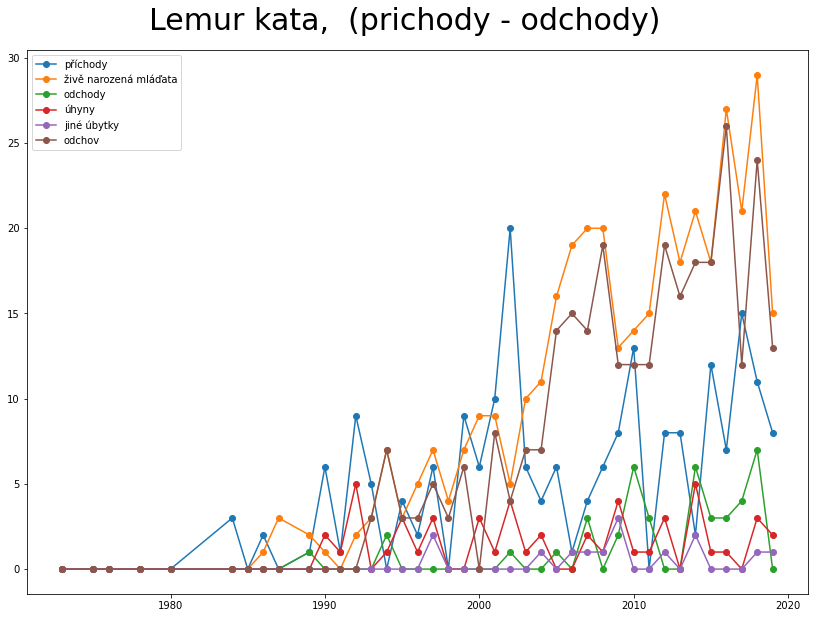

In [9]:
out_opt['suptitle'] = 'prichody - odchody'
cats = ['příchody', 'živě narozená mláďata', 'odchody', 'úhyny', 'jiné úbytky', 'odchov']
druh = 'Lemur kata'
# druh = None
plots.plot_one_zoo_rok(coll_roc, druh, None, cats, out_opt)

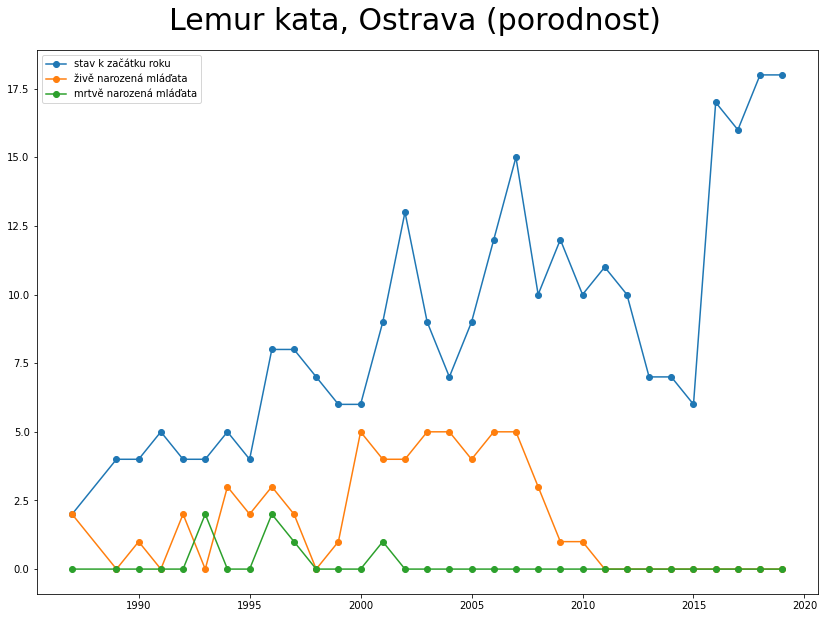

In [18]:
plots.plot_one_zoo_rok(coll_roc, 'Lemur kata', 'Ostrava', cats, out_opt)

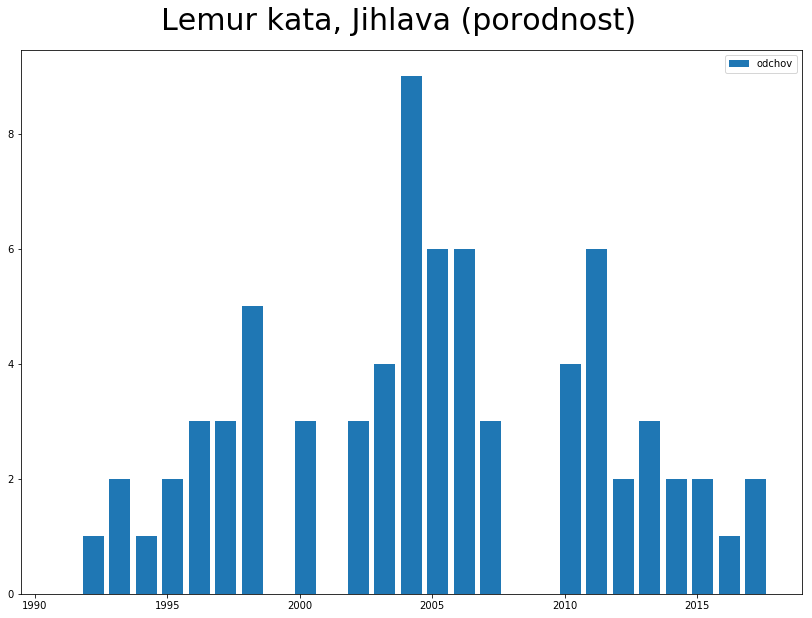

In [21]:
out_opt['suptitle'] = 'porodnost'
cats = ['odchov']
dbs.plot_one_zoo_rok(data, 'Lemur kata', 'Jihlava', cats, out_opt, bar=True)

In [16]:
list(data.aggregate([
    # first stage, filtruj na druhy a zoo
    {"$match" : {'Zoo' : 'Jihlava', 'Druh' : 'Lemur kata'}},
    
    # second stage, porodnost za roku
    {"$group" : {"_id" : "$Rok", "y" : {"$sum" : {"$reduce" : {"input" : "$odchov", "initialValue" : 0, "in"}}}}}
]))

OperationFailure: $reduce requires 'in' to be specified

## Porodnost přes všechny ZOO

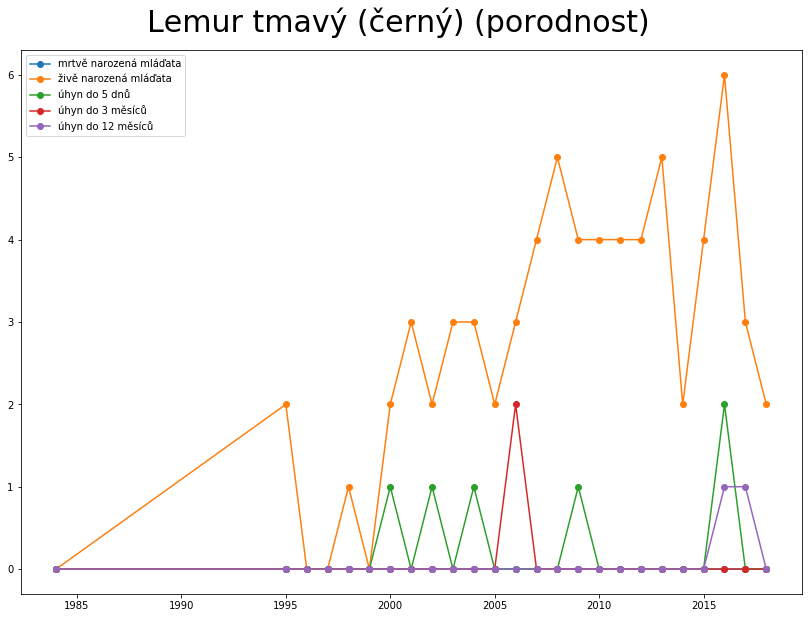

In [22]:
out_opt['suptitle'] = 'porodnost'
cats = ['mrtve_nar_mlad', 'zive_nar_mlad', 'uhyn_do_5d', 'uhyn_do_3m', 'uhyn_do_12m']
dbs.plot_cats_rok(data, 'Lemur tmavý (černý)', cats, out_opt)

## Porodnost přes všechny ZOO a vsechny druhy

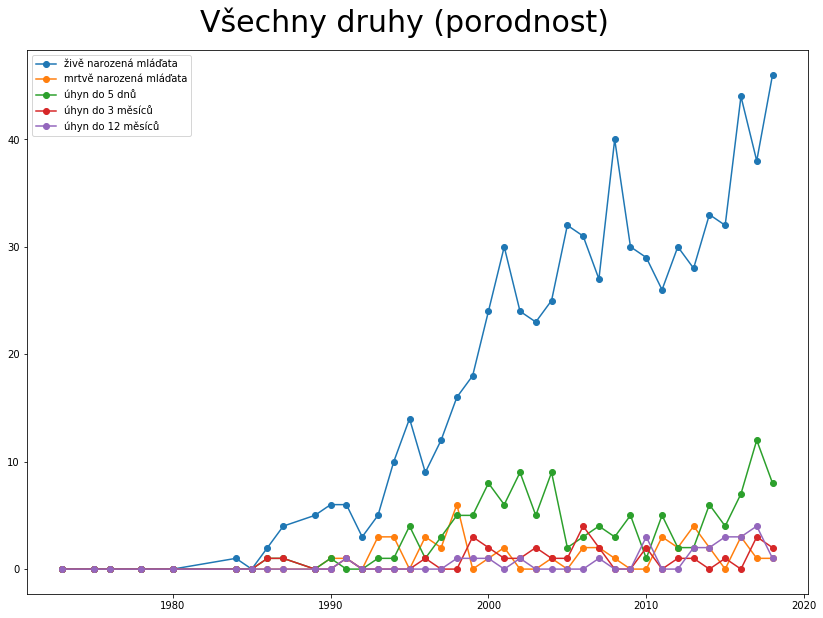

In [23]:
out_opt['suptitle'] = 'porodnost'
cats = ['zive_nar_mlad', 'mrtve_nar_mlad', 'uhyn_do_5d', 'uhyn_do_3m', 'uhyn_do_12m']
dbs.plot_cats_rok(data, None, cats, out_opt)

# Vytvoreni a reset databaze

In [6]:
# dbs.create_database()

## reset hesla

In [5]:
# import pymongo
# from getpass import getpass

# user = 'admin'
# db_a = client['admin']

# db_a.command("updateUser", user, pwd=getpass(prompt='Password:'))

## smaz vsechny zaznamy

In [4]:
print('Rocenky: ', coll_roc.delete_many({}).deleted_count)
print('Plemenne knihy: ', coll_knihy.delete_many({}).deleted_count)

Rocenky:  1054
Plemenne knihy:  363


## import dat - rocenky, plemenne knihy

In [5]:
xlsx_file = DROPBOX_ROOT + "souhrn_vse.xlsx"

# rocenky
xls.load_xlsx(xlsx_file,'rocenky', coll_roc)

# knihy
xls.load_xlsx(xlsx_file, 'knihy', coll_knihy)

Vlozeno 1054 zaznamu.
Vlozeno 363 zaznamu.
